In [1]:
pip install diffusers transformers scipy accelerate 

     |████████████████████████████████| 453 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 191 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 757 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 6.6 MB/s eta 0:00:01     |▊                               | 163 kB 5.2 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [2]:
with open('token.txt') as ifp:
    access_token = ifp.readline()
    print('Read a token of length {}'.format( len(access_token) ))

Read a token of length 37


In [3]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda"

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=access_token, device_map="auto", cache_dir="stable_diffusion_cache")
pipe = pipe.to(device)

Fetching 16 files: 100%|████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 90.42it/s]
/opt/conda/lib/python3.7/site-packages/diffusers/utils/deprecation_utils.py:35: FutureWarning: The configuration file of this scheduler: PNDMScheduler {
  "_class_name": "PNDMScheduler",
  "_diffusers_version": "0.9.0",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "num_train_timesteps": 1000,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "steps_offset": 0,
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instead of 0. Please make sure to update the config accordingly as leaving `steps_offset` might led to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull request for the `scheduler/scheduler_config.json` file
  warnings.warn(warning + message, FutureWarning)


In [13]:
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16, revision="fp16")
# pipe = pipe.to("cuda")

Fetching 16 files: 100%|██████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 6979.60it/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [14]:
prompt = "teachers tenure"
image = pipe(prompt).images[0]

100%|███████████████████████████████████████████████████████████████████████████████████| 51/51 [00:27<00:00,  1.87it/s]


In [15]:
path = "image_results/"
image_name = "teachers_tenure"

image.save(path + image_name + ".png")

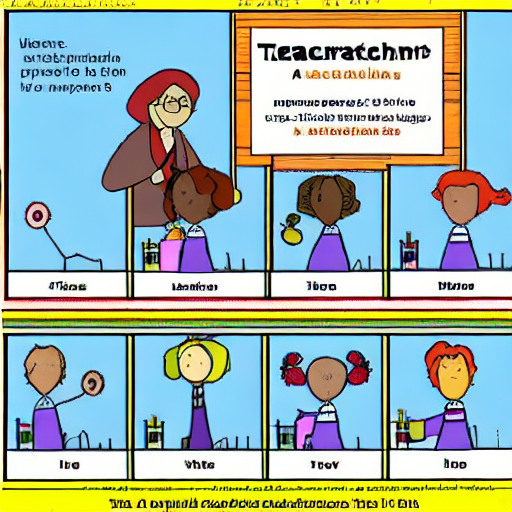

In [16]:
from PIL import Image

image = Image.open(path + image_name + ".png")
image.show()